# Ising Model

Using the Wolff Cluster Algorithm to optimize the Ising model and have better estimation of the behavior of the system near the critical temperature.

<code>Code adopted from: </code> Statistical Physics at Ecole Normal Superieur

In [39]:
import scipy
import pylab
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.patches import FancyArrowPatch
import random, math, os

In [40]:
L = 100
N = L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N)
                                    for i in range(N)}
T = 2.5
p  = 1.0 - math.exp(-2.0 / T)
nsteps = 10**4
S = [random.choice([1, -1]) for k in range(N)]

for step in range(nsteps):
    k = random.randint(0, N - 1)
    Pocket, Cluster = [k], [k]
    while Pocket != []:
        j = random.choice(Pocket)
        for l in nbr[j]:
            if S[l] == S[j] and l not in Cluster \
                   and random.uniform(0.0, 1.0) < p:
                Pocket.append(l)
                Cluster.append(l)
        Pocket.remove(j)
    for j in Cluster: S[j] *= -1

In [41]:
def energy(S, N, nbr):
    E = 0.0
    for k in range(N):
        E -=  S[k] * sum(S[nn] for nn in nbr[k])
    return 0.5 * E

L = 2
nbr = [[1, 2], [3, 0], [3, 0], [2, 1]]
S = [1, 1, -1, 1]
print(S, energy(S, L * L, nbr))

[1, 1, -1, 1] 0.0


-32 2
-24 32
-20 64
-16 424
-12 1728
-8 6688
-4 13568
0 20524
4 13568
8 6688
12 1728
16 424
20 64
24 32
32 2


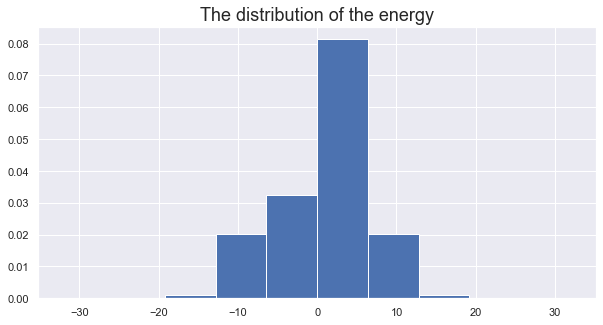

In [42]:
def gray_flip(t, N):
    k = t[0]
    if k > N: return t, k
    t[k - 1] = t[k]
    t[k] = k + 1
    if k != 1: t[0] = 1
    return t, k

L = 4
N = L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N)
                                    for i in range(N)}
S = [-1] * N
E = -2 * N
dos = {}
dos[E] = 1
hist = []
tau = list(range(1, N + 2))
for i in range(1, 2 ** N):
    tau, k = gray_flip(tau, N)
    h = sum(S[n] for n in nbr[k - 1])
    E += 2 * h * S[k - 1] 
    S[k - 1] *= -1
    hist.append(E)
    if E in dos: dos[E] += 1
    else: dos[E] = 1

for E in sorted(dos.keys()):
    print(E, dos[E])
    
plt.figure(figsize=(10, 5))
plt.title('The distribution of the energy', fontsize=18)
plt.hist(hist, density=True)
plt.show()

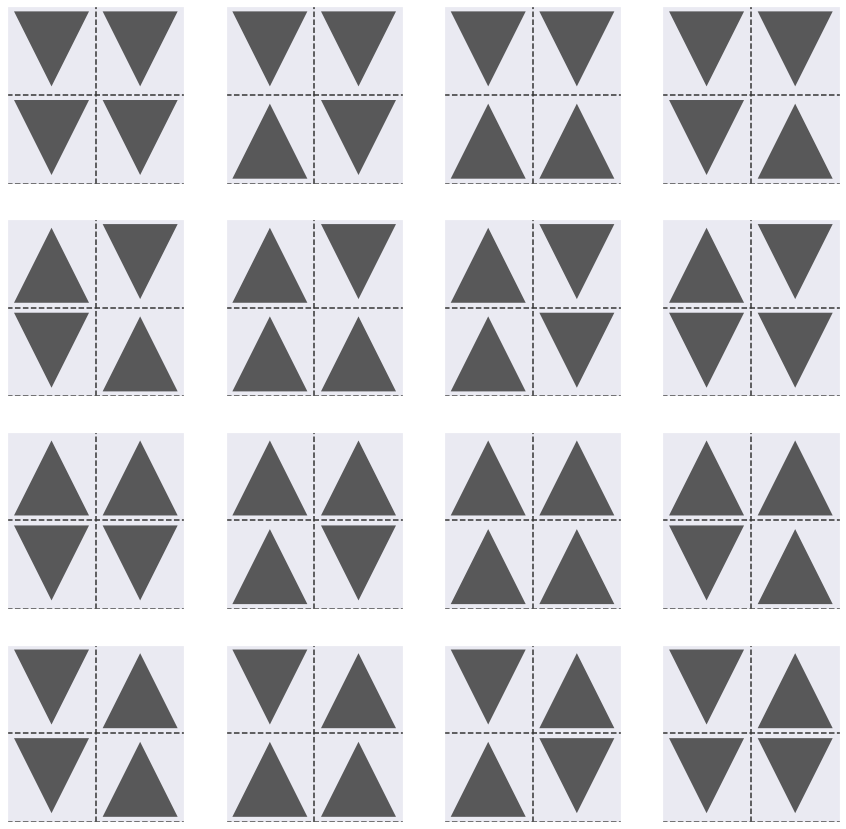

In [43]:
def plot_spin(c, L):
    s = 1.0 / L
    for i in range(L):
        for j in range(L):
            x, y, dy = (i + 0.5) * s, (j + 0.5) * s, 0.85 * s * c[i][j]
            arrow = FancyArrowPatch((x, y - 0.5 * dy), (x, y + 0.5 * dy),
                    color='.2', lw=0, alpha=.8, arrowstyle="Simple" +
                    ", head_length=" + str(1 * 150 * s) +
                    ", head_width=" + str(1 * 150 * s) +
                    ", tail_width=" + str(1 * 40 * s))
            pylab.gca().add_patch(arrow)
    pylab.axis('scaled')
    pylab.axis([0, 1, 0, 1])
    pylab.gca().set_xticks([])
    pylab.gca().set_yticks([])
    [pylab.axhline(y=(i * s), ls='--', c='.2') for i in range(L)]
    [pylab.axvline(x=(j * s), ls='--', c='.2') for j in range(L)]
    #pylab.show()


plt.figure(figsize=(15, 15))
L = 2
N = L * L
site_dic = {(j // L, j - (j // L) * L) : j for j in range(N)}
S = [-1] * N
plt.subplot(4, 4, 1)
plot_spin([[S[site_dic[(a, b)]] for a in range(L)] for b in range(L)], L)


tau = list(range(1, N + 2))

for i in range(2, 2**N + 1):
    tau, k = gray_flip(tau, N)
    S[k - 1] *= -1
    plt.subplot(4, 4, i)
    plot_spin([[S[site_dic[(a, b)]] for a in range(L)] for b in range(L)], L)

In [44]:
L = 16
N = L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N) \
                                    for i in range(N)}
nsteps = 10**6
T = 2.0
beta = 1.0 / T
S = [random.choice([1, -1]) for k in range(N)]

for step in range(nsteps):
    k = random.randint(0, N - 1)
    delta_E = 2.0 * S[k] * sum(S[nn] for nn in nbr[k])
    if random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
        S[k] *= -1
print(S, sum(S))

[-1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

T = 1.0
T = 2.0
T = 3.0
T = 4.0


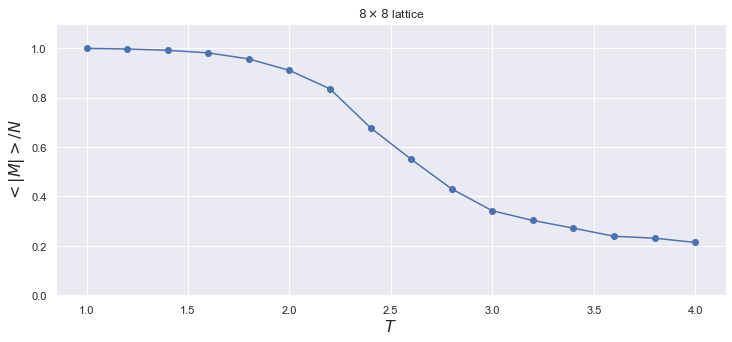

In [35]:
L = 8
N = L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N) \
                                    for i in range(N)}
nsteps = 10000 * N
list_T = np.linspace(1, 4, 16)
list_av_m = []
S = [random.choice([1, -1]) for k in range(N)]
M = sum(S)
for T in list_T:
    if T%1==0: print('T =', T)
    beta = 1.0 / T
    M_tot = 0.0
    n_measures = 0
    for step in range(nsteps):
        k = random.randint(0, N - 1)
        delta_E = 2.0 * S[k] * sum(S[nn] for nn in nbr[k])
        if random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
            S[k] *= -1
            M += 2 * S[k]
        if step % N == 0 and step > nsteps / 2:
            M_tot += abs(M)
            n_measures += 1
    list_av_m.append(abs(M_tot) / float(n_measures * N))

plt.figure(figsize=(12, 5))
pylab.title('$%i\\times%i$ lattice' % (L, L))
pylab.xlabel('$T$', fontsize=16)
pylab.ylabel('$<|M|>/N$', fontsize=16)
pylab.plot(list_T, list_av_m, 'bo-', clip_on=False)
pylab.ylim(0.0, 1.1)
plt.show()

In [36]:
L = 6
N = L * L

filename = 'data_dos_L%i.txt' % L
if os.path.isfile(filename):
    dos = {}
    f = open(filename, 'r')
    for line in f:
        E, N_E = line.split()
        dos[int(E)] = int(N_E)
    f.close()
    
else: exit('input file missing')

list_T = [0.5 + 0.5 * i for i in range(10)]
for T in list_T:
    Z = 0.0
    E_av = 0.0
    M_av = 0.0
    E2_av = 0.0
    for E in dos.keys():
        weight = math.exp(- E / T) * dos[E]
        Z += weight
        E_av += weight * E
        E2_av += weight * E ** 2
    E2_av /= Z
    E_av /= Z
    cv = (E2_av - E_av ** 2) / N / T ** 2
    print(T, E_av / float(N), cv)

0.5 -0.8888884883606687 1.2823361076799403e-05
1.0 -0.8876259734470079 0.01040417664748361
1.5 -0.8669522495375384 0.08904438798879957
2.0 -0.7801690172344156 0.2691256254266929
2.5 -0.6129406587819327 0.36111787975131493
3.0 -0.45203094531337584 0.26805987300155804
3.5 -0.344955577971042 0.16700246088005852
4.0 -0.2779938354263487 0.10671495770792427
4.5 -0.23385147345395751 0.07299192105459093
5.0 -0.2027268309079321 0.05313163946104702


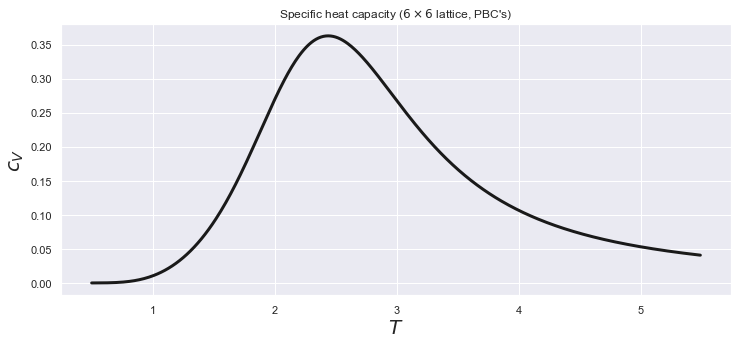

In [38]:
L = 6
N = L * L
filename = 'data_dos_L%i.txt' % L
if os.path.isfile(filename):
    dos = {}
    f = open(filename, 'r')
    for line in f:
        E, N_E = line.split()
        dos[int(E)] = int(N_E)
    f.close()
else: exit('input file missing')

list_T = [0.5 + 0.01 * i for i in range(500)]
list_cv = []
for T in list_T:
    Z = 0.0
    E_av = 0.0
    M_av = 0.0
    E2_av = 0.0
    for E in dos.keys():
        weight = math.exp(- E / T) * dos[E]
        Z += weight
        E_av += weight * E
        E2_av += weight * E ** 2
    E2_av /= Z
    E_av /= Z
    cv = (E2_av - E_av ** 2) / N / T ** 2
    list_cv.append(cv)
    
plt.figure(figsize=(12, 5))
pylab.title('Specific heat capacity ($%i\\times%i$ lattice, PBC\'s)' % (L, L))
pylab.xlabel('$T$', fontsize=20)
pylab.ylabel('$c_V$', fontsize=20)
pylab.plot(list_T, list_cv, 'k-', lw=3)
pylab.show()